In [1]:
import cv2
import pandas as pd
import numpy as np

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import os
import random
import gc
import tensorflow as tf

In [2]:
file1 = "E:/351A4/dblp-ref/dblp-ref-0.json"
file2 = "E:/351A4/dblp-ref/dblp-ref-0.json"
file3 = "E:/351A4/dblp-ref/dblp-ref-0.json"
file4 = "E:/351A4/dblp-ref/dblp-ref-0.json"
data = pd.read_json(file1, lines=True)
data1 = pd.read_json(file2, lines=True)
data2 = pd.read_json(file3, lines=True)
data3 = pd.read_json(file4, lines=True)

In [3]:
data = data.append(data1)
data = data.append(data2)
data = data.append(data3)
print(data)

                                                 abstract  \
0       The purpose of this study is to develop a lear...   
1       This paper describes the design and implementa...   
2       This article applied GARCH model instead AR or...   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
999995                                                NaN   
999996  In the last few years, workflow systems have b...   
999997  There are many different designs for audio amp...   
999998  This paper proposes a language acquisition fra...   
999999  Abstract   This thesis investigates the mathem...   

                                                  authors  n_citation  \
0       [Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...           0   
1                             [Gareth Beale, Graeme Earl]          50   
2       [Altaf Hossain, Faisal Zaman, Mohammed N

In [4]:
data = data.dropna(subset=['abstract'])
print(data)

                                                 abstract  \
0       The purpose of this study is to develop a lear...   
1       This paper describes the design and implementa...   
2       This article applied GARCH model instead AR or...   
10      Recent achievements in Natural Language Proces...   
12      Recently, Bridges and Reich introduced the con...   
...                                                   ...   
999994  A new non-invasive method for delineation of l...   
999996  In the last few years, workflow systems have b...   
999997  There are many different designs for audio amp...   
999998  This paper proposes a language acquisition fra...   
999999  Abstract   This thesis investigates the mathem...   

                                                  authors  n_citation  \
0       [Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...           0   
1                             [Gareth Beale, Graeme Earl]          50   
2       [Altaf Hossain, Faisal Zaman, Mohammed N

In [5]:
data = data.explode(column = "abstract")

In [6]:
print(data)

                                                 abstract  \
0       The purpose of this study is to develop a lear...   
1       This paper describes the design and implementa...   
2       This article applied GARCH model instead AR or...   
10      Recent achievements in Natural Language Proces...   
12      Recently, Bridges and Reich introduced the con...   
...                                                   ...   
999994  A new non-invasive method for delineation of l...   
999996  In the last few years, workflow systems have b...   
999997  There are many different designs for audio amp...   
999998  This paper proposes a language acquisition fra...   
999999  Abstract   This thesis investigates the mathem...   

                                                  authors  n_citation  \
0       [Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...           0   
1                             [Gareth Beale, Graeme Earl]          50   
2       [Altaf Hossain, Faisal Zaman, Mohammed N

In [7]:
data["abstract"] = data["abstract"].astype(str)

In [8]:
df1 = data[(data['abstract'].str.contains("deep") | data['abstract'].str.contains('Deep')) & (data['abstract'].str.contains("Learning") | data['abstract'].str.contains('learning')) & (data['abstract'].str.contains("AI") | data['abstract'].str.contains('ai'))]

print(df1)

                                                 abstract  \
2186    The author's goal within the present paper is ...   
3004    Machine Learning: A Guide to Current Research ...   
5651    Image denoising based on a probabilistic model...   
6427    ABSTRACT The research described in this articl...   
9235    We studied the effect of post-practice reflect...   
...                                                   ...   
991371  On the surface, it seems like teaching about g...   
994514  We study the problem of how to build a deep le...   
995749  Identification of cancer subtypes plays an imp...   
998252  This paper explores how to extract argumentati...   
999016  Traditional automatic repeat request (ARQ) pro...   

                                                  authors  n_citation  \
2186    [Aurelian Stănescu, Ioan Dumitrache, Markus He...           4   
3004                                        [Keith Price]           0   
5651                                      [Kyung

In [9]:
df1 = df1.explode(column = "references")

In [10]:
print(df1)

                                                 abstract  \
2186    The author's goal within the present paper is ...   
3004    Machine Learning: A Guide to Current Research ...   
5651    Image denoising based on a probabilistic model...   
5651    Image denoising based on a probabilistic model...   
5651    Image denoising based on a probabilistic model...   
...                                                   ...   
999016  Traditional automatic repeat request (ARQ) pro...   
999016  Traditional automatic repeat request (ARQ) pro...   
999016  Traditional automatic repeat request (ARQ) pro...   
999016  Traditional automatic repeat request (ARQ) pro...   
999016  Traditional automatic repeat request (ARQ) pro...   

                                                  authors  n_citation  \
2186    [Aurelian Stănescu, Ioan Dumitrache, Markus He...           4   
3004                                        [Keith Price]           0   
5651                                      [Kyung

In [11]:
df2 = df1[df1.year > 2015] #2014 on this test run

In [12]:
print(df2)

                                                 abstract  \
56899   Given a matrix A, a linear feasibility problem...   
56899   Given a matrix A, a linear feasibility problem...   
56899   Given a matrix A, a linear feasibility problem...   
56899   Given a matrix A, a linear feasibility problem...   
56899   Given a matrix A, a linear feasibility problem...   
...                                                   ...   
994514  We study the problem of how to build a deep le...   
994514  We study the problem of how to build a deep le...   
994514  We study the problem of how to build a deep le...   
994514  We study the problem of how to build a deep le...   
994514  We study the problem of how to build a deep le...   

                                                  authors  n_citation  \
56899                       [Aaditya Ramdas, Javier Peña]           0   
56899                       [Aaditya Ramdas, Javier Peña]           0   
56899                       [Aaditya Ramdas, Jav

In [13]:
data2 = df2[['id', 'references']]
print(data2)

                                          id  \
56899   88318d2a-d12f-467c-8b1d-a4b04057d335   
56899   88318d2a-d12f-467c-8b1d-a4b04057d335   
56899   88318d2a-d12f-467c-8b1d-a4b04057d335   
56899   88318d2a-d12f-467c-8b1d-a4b04057d335   
56899   88318d2a-d12f-467c-8b1d-a4b04057d335   
...                                      ...   
994514  4960db2a-310d-4112-8925-75a54d9da6dc   
994514  4960db2a-310d-4112-8925-75a54d9da6dc   
994514  4960db2a-310d-4112-8925-75a54d9da6dc   
994514  4960db2a-310d-4112-8925-75a54d9da6dc   
994514  4960db2a-310d-4112-8925-75a54d9da6dc   

                                  references  
56899   02f01fc2-e881-457b-9787-fa7927c4f13e  
56899   21b7e952-d559-4fb8-8e0e-f9ae7dda156e  
56899   3012d81b-46f8-47d2-8e1b-3977bf4b7b1b  
56899   37a95a19-b9e2-4636-bd7e-00d18cd402a1  
56899   5452825f-c8c2-4795-b73e-49d283da7c93  
...                                      ...  
994514  e1eb2aeb-c2c6-4e81-bdb0-a12280303919  
994514  e2f7a74a-8430-4463-94ce-fe85dfd309f9  


In [14]:
import networkx as nx

G = nx.Graph()

In [15]:
G = nx.from_pandas_edgelist(df2, 'id' , 'references')
nx.is_connected(G)

False

In [16]:
#check to see sizes of subgraphs
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[1375, 29, 26, 15, 13, 11, 9, 8, 8]

In [17]:
#since not connected further analysis will be done on the largest subgraph especially since its substantially larger 
#Also since some metric cannot be calculated on the entire graph due to the graph being not connected
#and calculating for each subgraph is too expensive

G = G.subgraph(max(nx.connected_components(G), key=len))

In [18]:
print("number of nodes")
print(G.number_of_nodes())

number of nodes
1375


In [19]:
print("number of edges")
print(G.number_of_edges())

number of edges
1721


In [20]:
print("average degree connectivity")
print(nx.algorithms.assortativity.k_nearest_neighbors(G))

average degree connectivity
{32: 1.8125, 1: 44.57320319432121, 2: 46.87786259541985, 3: 46.833333333333336, 5: 43.725, 52: 2.3846153846153846, 8: 43.166666666666664, 7: 40.57142857142857, 4: 45.55, 27: 16.51851851851852, 44: 1.9090909090909092, 29: 2.9482758620689653, 40: 2.0625, 12: 25.458333333333332, 6: 45.27777777777778, 86: 2.0232558139534884, 9: 50.55555555555556, 11: 48.72727272727273, 58: 2.5689655172413794, 16: 4.1875, 48: 2.3958333333333335, 64: 2.28125, 30: 3.1666666666666665, 31: 1.4516129032258065, 28: 2.2738095238095237, 61: 2.1311475409836067, 47: 2.776595744680851, 68: 2.485294117647059, 49: 3.4489795918367347, 20: 1.45, 18: 1.3888888888888888, 39: 2.1794871794871793, 36: 2.3333333333333335, 45: 2.1, 53: 2.8867924528301887, 38: 3.236842105263158, 33: 3.090909090909091, 34: 1.1470588235294117}


In [21]:
nx.is_connected(G)

True

In [22]:
#graph is connected so can calculate radius
print("Radius of G")
print(nx.algorithms.distance_measures.radius(G))


Radius of G
5


In [23]:
print("Diameter of G")
print(nx.algorithms.distance_measures.diameter(G))

Diameter of G
10


In [24]:
print("density of the graph is:")
print(nx.classes.function.density(G))

density of the graph is:
0.001821886992192669


Counter({1: 1127, 2: 131, 3: 38, 4: 15, 5: 8, 40: 4, 52: 3, 32: 3, 28: 3, 27: 3, 8: 3, 6: 3, 58: 2, 47: 2, 45: 2, 29: 2, 20: 2, 16: 2, 12: 2, 7: 2, 86: 1, 68: 1, 64: 1, 61: 1, 53: 1, 49: 1, 48: 1, 44: 1, 39: 1, 38: 1, 36: 1, 34: 1, 33: 1, 31: 1, 30: 1, 18: 1, 11: 1, 9: 1})
(1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 3, 2, 1, 2, 2, 1, 1, 3, 2, 3, 8, 15, 38, 131, 1127)
size is: 38
[   1    1    1    1    2    1    3    1    1    2    2    1    4    1
    1    1    1    1    3    1    1    2    3    3    2    1    2    2
    1    1    3    2    3    8   15   38  131 1127]


[Text(86.4, 0, '86'),
 Text(68.4, 0, '68'),
 Text(64.4, 0, '64'),
 Text(61.4, 0, '61'),
 Text(58.4, 0, '58'),
 Text(53.4, 0, '53'),
 Text(52.4, 0, '52'),
 Text(49.4, 0, '49'),
 Text(48.4, 0, '48'),
 Text(47.4, 0, '47'),
 Text(45.4, 0, '45'),
 Text(44.4, 0, '44'),
 Text(40.4, 0, '40'),
 Text(39.4, 0, '39'),
 Text(38.4, 0, '38'),
 Text(36.4, 0, '36'),
 Text(34.4, 0, '34'),
 Text(33.4, 0, '33'),
 Text(32.4, 0, '32'),
 Text(31.4, 0, '31'),
 Text(30.4, 0, '30'),
 Text(29.4, 0, '29'),
 Text(28.4, 0, '28'),
 Text(27.4, 0, '27'),
 Text(20.4, 0, '20'),
 Text(18.4, 0, '18'),
 Text(16.4, 0, '16'),
 Text(12.4, 0, '12'),
 Text(11.4, 0, '11'),
 Text(9.4, 0, '9'),
 Text(8.4, 0, '8'),
 Text(7.4, 0, '7'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1')]

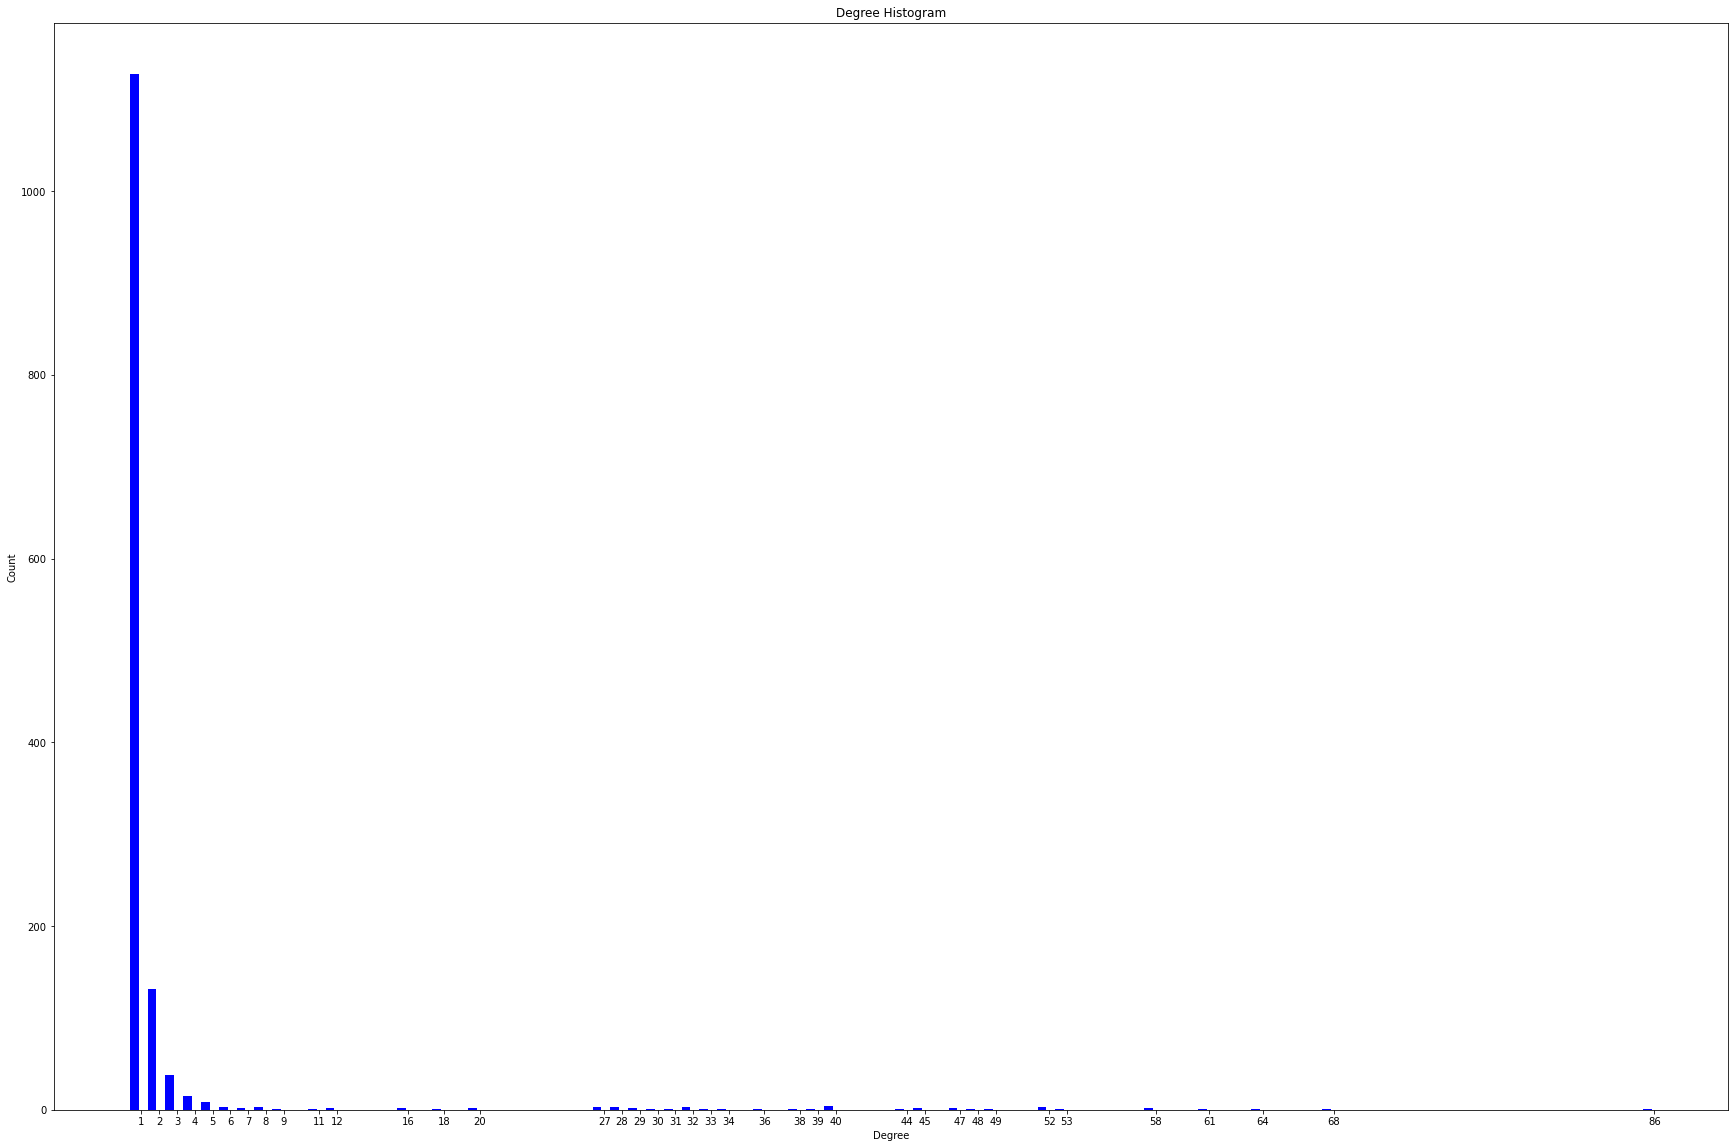

In [25]:
import collections
import math
import numpy
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter((degree_sequence))
print(degreeCount)

deg, cnt = zip(*degreeCount.items())
#print(deg)
print(cnt)
cnt = numpy.asarray(cnt)
deg = numpy.asarray(deg)
x = cnt.size
print("size is:" ,x)

"""while i < cnt.size:
    cnt[i] = math.log(cnt[i])
    i = i+1"""
"""j=0
while j < deg.size:
    deg[j] = math.log(deg[j])
    j = j+1  """

print(cnt)

fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(30)
plt.bar(deg, cnt, width=0.5, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

Counter({1: 1127, 2: 131, 3: 38, 4: 15, 5: 8, 40: 4, 52: 3, 32: 3, 28: 3, 27: 3, 8: 3, 6: 3, 58: 2, 47: 2, 45: 2, 29: 2, 20: 2, 16: 2, 12: 2, 7: 2, 86: 1, 68: 1, 64: 1, 61: 1, 53: 1, 49: 1, 48: 1, 44: 1, 39: 1, 38: 1, 36: 1, 34: 1, 33: 1, 31: 1, 30: 1, 18: 1, 11: 1, 9: 1})
(1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 3, 2, 1, 2, 2, 1, 1, 3, 2, 3, 8, 15, 38, 131, 1127)
size is: 38
[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 2 2 3 4
 7]


[Text(4.4, 0, '4'),
 Text(4.4, 0, '4'),
 Text(4.4, 0, '4'),
 Text(4.4, 0, '4'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(2.4, 0, '2'),
 Text(2.4, 0, '2'),
 Text(2.4, 0, '2'),
 Text(2.4, 0, '2'),
 Text(2.4, 0, '2'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1'),
 Text(1.4, 0, '1'),
 Text(1.4, 0, '1'),
 Text(1.4, 0, '1'),
 Text(1.4, 0, '1'),
 Text(0.4, 0, '0'),
 Text(0.4, 0, '0')]

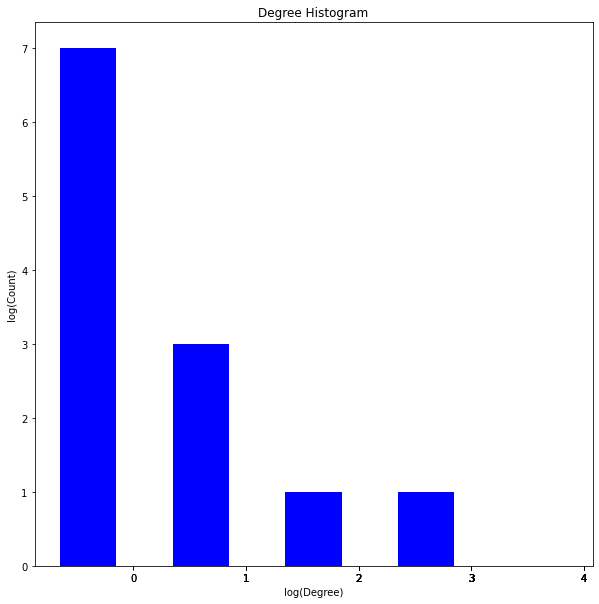

In [26]:
#log-log plot
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter((degree_sequence))
print(degreeCount)

deg, cnt = zip(*degreeCount.items())
#print(deg)
print(cnt)
cnt = numpy.asarray(cnt)
deg = numpy.asarray(deg)
x = cnt.size
print("size is:" ,x)
i = 0

while i < cnt.size:
    cnt[i] = math.log(cnt[i])
    i = i+1
j=0
while j < deg.size:
    deg[j] = math.log(deg[j])
    j = j+1

print(cnt)

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.bar(deg, cnt, width=0.5, color="b")

plt.title("Degree Histogram")
plt.ylabel("log(Count)")
plt.xlabel("log(Degree)")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

In [27]:
x = nx.degree_centrality(G)

max(x.values())

0.06259097525473072

In [28]:
for key, value in x.items():
    if max(x.values()) == value:
        print(key)

a9cb3b1c-2eda-45ef-b4db-57d4542f0852


In [29]:
y = nx.eigenvector_centrality(G)

In [30]:
max(y.values())

0.28803812899903264

In [31]:
for key, value in y.items():
    if max(y.values()) == value:
        print(key)

a9cb3b1c-2eda-45ef-b4db-57d4542f0852


In [32]:
z = nx.closeness_centrality(G)
for key, value in z.items():
    if max(z.values()) == value:
        print(key)

e2f7a74a-8430-4463-94ce-fe85dfd309f9


In [33]:
max(z.values())

0.3847661719406329

In [34]:
from gae.preprocessing import mask_test_edges

In [35]:
np.random.seed(0) # make sure train-test split is consistent between notebooks
adj_sparse = nx.to_scipy_sparse_matrix(G)

# Perform train-test split
adj_train, train_edges, val_edges, val_edges_false, test_edges, test_edges_false = mask_test_edges(adj_sparse)
g_train = nx.from_scipy_sparse_matrix(adj_train) # new graph object with only non-hidden edges

In [36]:
# Inspect train/test split
print ("Total nodes:", adj_sparse.shape[0])
print ("Total edges:", int(adj_sparse.nnz/2)) # adj is symmetric, so nnz (num non-zero) = 2*num_edges
print ("Training edges (positive):", len(train_edges))
print ("Validation edges (positive):", len(val_edges))
print ("Validation edges (negative):", len(val_edges_false))
print ("Test edges (positive):", len(test_edges))
print ("Test edges (negative):", len(test_edges_false))

Total nodes: 1375
Total edges: 1721
Training edges (positive): 1463
Validation edges (positive): 86
Validation edges (negative): 86
Test edges (positive): 172
Test edges (negative): 172


In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

def get_roc_score(edges_pos, edges_neg, score_matrix):
    # Store positive edge predictions, actual values
    preds_pos = []
    pos = []
    for edge in edges_pos:
        preds_pos.append(score_matrix[edge[0], edge[1]]) # predicted score
        pos.append(adj_sparse[edge[0], edge[1]]) # actual value (1 for positive)
        
    # Store negative edge predictions, actual values
    preds_neg = []
    neg = []
    for edge in edges_neg:
        preds_neg.append(score_matrix[edge[0], edge[1]]) # predicted score
        neg.append(adj_sparse[edge[0], edge[1]]) # actual value (0 for negative)
        
    # Calculate scores
    preds_all = np.hstack([preds_pos, preds_neg])
    labels_all = np.hstack([np.ones(len(preds_pos)), np.zeros(len(preds_neg))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)
    return roc_score, ap_score

In [38]:
#compute adjacency matrix
adj = nx.adjacency_matrix(G)

In [39]:
# Compute Jaccard Coefficients from g_train
jc_matrix = np.zeros(adj.shape)
for u, v, p in nx.jaccard_coefficient(g_train): # (u, v) = node indices, p = Jaccard coefficient
    jc_matrix[u][v] = p
    jc_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
jc_matrix = jc_matrix / jc_matrix.max()

# Calculate ROC AUC and Average Precision
jc_roc, jc_ap = get_roc_score(test_edges, test_edges_false, jc_matrix)

print('Jaccard Coefficient Test ROC score: ', str(jc_roc))
print('Jaccard Coefficient Test AP score: ', str(jc_ap))

Jaccard Coefficient Test ROC score:  0.48806787452677125
Jaccard Coefficient Test AP score:  0.49514581026208926


In [40]:
adj_G = nx.to_numpy_matrix(G)

In [41]:
nodes = list(G.nodes())

In [42]:
fb_links = list(G.edges())

In [43]:
len(nodes)

1375

In [44]:
# captture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in (fb_links):
  node_list_1.append(i[0])
  node_list_2.append(i[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

In [45]:
print(len(node_list_1))
print(len(node_list_2))

1721
1721


In [46]:
node_list_1 = []
node_list_2 = []

for i in fb_links:
    k = 0
    for j in nodes:
        if i[0] == j:
            node_list_1.append(k)
        if i[1] == j:
            node_list_2.append(k)
        k = k+1

In [47]:
print(len(node_list_1))

1721


In [48]:
print(len(node_list_2))

1721


In [49]:
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

In [50]:
print(len(node_list))

1375


In [51]:
node_number = []
i = 0;
while i < 1375:
    node_number.append(i)
    i = i+1

In [52]:
print(node_number)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [53]:
from tqdm import tqdm
# get unconnected node-pairs
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
  for j in range(offset,adj_G.shape[1]):
    if i != j:
      if nx.shortest_path_length(G, (nodes[i]), (nodes[j])) <=2:
        if adj_G[i,j] == 0:
          all_unconnected_pairs.append([node_number[i],node_number[j]])

  offset = offset + 1

100%|██████████████████████████████████████████████████████████████████████████████| 1375/1375 [01:47<00:00, 12.82it/s]


In [54]:
len(all_unconnected_pairs)

36987

In [55]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

In [56]:
G.edges()

EdgeView([('e83f1d99-2134-4b9c-bd27-8baa50e317df', '06034fec-e6b5-4e0a-a808-da059b4ce539'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '086516e9-82c0-484f-a641-821f443c7159'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '12d6aa75-3066-4e5f-a73d-f0d56c9d99f5'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '12fa9885-b0a9-4ea3-a0de-e020c333c3f0'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '1e320212-842d-4f75-b214-6802ecaf91af'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '1f8f1317-5769-48ff-820e-4dfe6bed75c6'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '279b1b52-ddf5-454a-b901-8b431cf9b57f'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '2bc32d49-acf7-4102-93c2-226fd31e4bb9'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '310cbba4-d88d-4bf4-a4f2-738f91b5f8c8'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '3b6bc07d-6e8d-420c-93aa-e2df1da6f7de'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '3c457738-f3b0-43bc-9d0e-8219f5f79434'), ('e83f1d99-2134-4b9c-bd27-8baa50e317df', '46334be0-0737-4305-8a8d-62704318dfb3'), ('e83f

In [57]:
fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

In [58]:
fb_df.head()

,node_1,node_2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [59]:
initial_node_count = len(G.nodes)

fb_df_temp = fb_df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(fb_df.index.values):
  
  # remove a node pair and build a new graph
  G_temp = nx.from_pandas_edgelist(fb_df_temp.drop(index = i), "node_1", "node_2", create_using=nx.Graph())
  
  # check there is no spliting of graph and number of nodes is same
  if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
    omissible_links_index.append(i)
    fb_df_temp = fb_df_temp.drop(index = i)

100%|█████████████████████████████████████████████████████████████████████████████| 1721/1721 [00:12<00:00, 142.20it/s]


In [60]:
len(omissible_links_index)

347

In [61]:
# create dataframe of removable edges
fb_df_ghost = fb_df.loc[omissible_links_index]

# add the target variable 'link'
fb_df_ghost['link'] = 1

data = data.append(fb_df_ghost[['node_1', 'node_2', 'link']], ignore_index=True)


In [62]:
data['link'].value_counts()

0    36987
1      347
Name: link, dtype: int64

In [63]:
# drop removable edges
fb_df_partial = fb_df.drop(index=fb_df_ghost.index.values)

# build graph
G_data = nx.from_pandas_edgelist(fb_df_partial, "node_1", "node_2", create_using=nx.Graph())

In [64]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

C:\Users\jcsan\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Generating walks (CPU: 1):   0%|                                                                | 0/50 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:30<00:00,  1.63it/s]


In [65]:
print(data)

       node_1  node_2  link
0           0     159     0
1           0     365     0
2           0     484     0
3           0     565     0
4           0     611     0
...       ...     ...   ...
37329     910     915     1
37330     965     977     1
37331     995     997     1
37332    1051    1053     1
37333    1213    1223     1

[37334 rows x 3 columns]


In [66]:
#print(n2w_model[str(0)])

In [67]:
x = [(n2w_model.wv[data.loc[i, 'node_1']]+n2w_model.wv[data.loc[j, 'node_2']]) for i,j in zip(data['node_1'], data['node_2'])]

In [68]:
x

[array([ 0.49732056,  0.58692026,  0.08031875, -0.04597411, -0.4909574 ,
        -0.88959473,  0.25170782,  0.37683296, -0.7180523 , -0.9829386 ,
         0.32443604, -0.62225413, -0.8661368 ,  0.11509975,  0.6246369 ,
        -0.2303064 ,  0.9004205 , -0.09948016, -0.39069033, -1.7318271 ,
         0.87491107,  0.92772055,  0.75918055, -0.30673918,  0.12999609,
         0.5518352 , -1.6308666 , -0.5649147 , -0.11957356,  0.5266556 ,
        -0.22676203,  0.44026828,  0.97751355, -0.93684196,  0.20452827,
         0.58048517, -0.29172724, -0.70636237, -0.9845759 , -0.8517606 ,
         0.06952398, -0.3365627 , -0.09293321, -0.18577354,  0.21526094,
        -1.3077729 , -1.3314233 , -0.14131847,  0.5219715 ,  0.23704581,
        -0.28944165, -0.46295828, -0.6860379 ,  0.49233997, -0.21369675,
        -0.051557  ,  0.952567  , -0.11872465, -0.6263206 ,  0.6935778 ,
         0.09608869, -0.2502745 , -0.12350485,  0.53348124, -0.47702265,
         0.93953824, -0.3862878 ,  0.44305408, -0.4

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [70]:
len(x)

37334

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(x), data['link'], 
                                                test_size = 0.3, 
                                                random_state = 35)

In [72]:
lr = LogisticRegression(solver='liblinear', random_state=0, class_weight="balanced")

lr.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [73]:
predictions = lr.predict_proba(xtest)

In [74]:
roc_auc_score(ytest, predictions[:,1])

0.7995045491397171

In [75]:
from sklearn.metrics import average_precision_score
average_precision_score(ytest, predictions[:,1])

0.04208871733244422

In [76]:
confusion_matrix(ytest, predictions[:,1])

ValueError: Classification metrics can't handle a mix of binary and continuous targets